# Where do new traits come from?

This notebook will explore a simple example of the evolution of new traits

Let's start with a simple simulation of a basic blob population living in a basic environment. These blobs will be okay at surviving and okay at reproducing, but will do nothing much else

In [1]:
import sys
sys.path.append('..')
from environment import *
from blobs import *

%load_ext autoreload
%autoreload 2

In [10]:
basic_population = [BaseBlob() for x in range(25)]
for p in basic_population:
    p.set_probs(0.5, 0.5, 0.0)
e = BaseEnvironment()
e.spawn_population(basic_population)

Let's see what happens if we leave them alone for 30 epochs

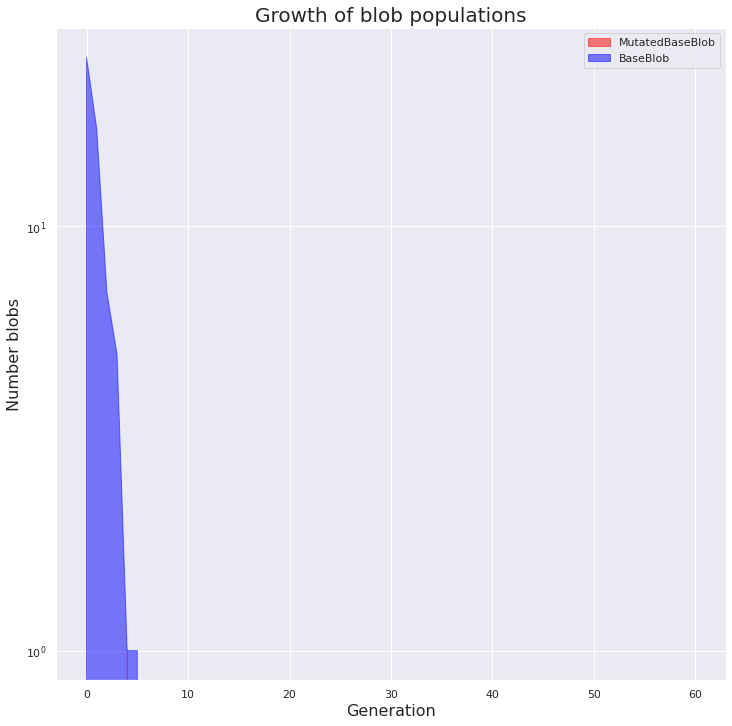

In [12]:
for i in range(30):
    e.interact()
e.plot_growth()

As expected, the population just dies off relatively quickly. This is because not enough blobs are reproducing to make up for the ones that are dying. This won't do, as we want our blobs to grow up healthy, strong, and produce many more generations of blobs

Let's tweak the survival attribute to make our next blob population sturdier and see what happens

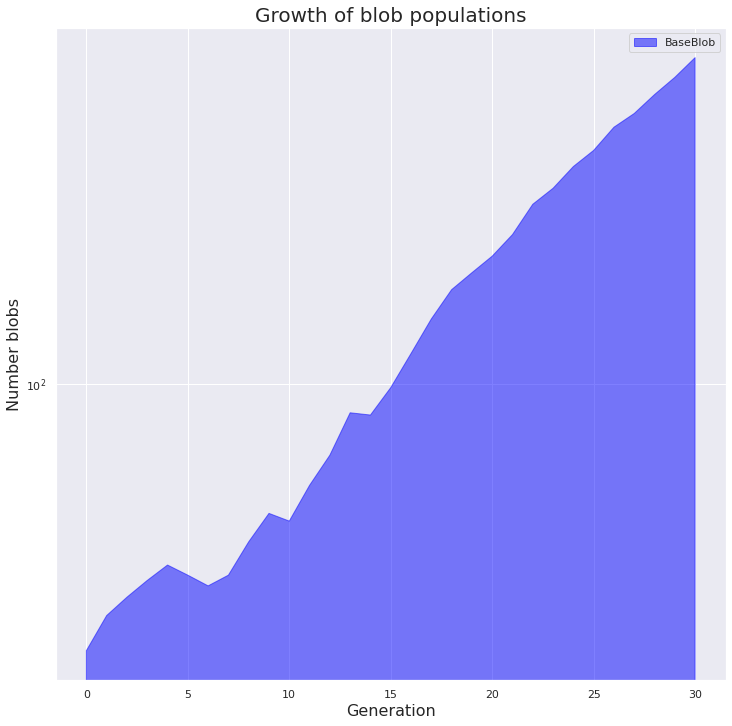

In [57]:
sturdier_population = [BaseBlob() for x in range(25)]
for stud in sturdier_population:
    stud.set_probs(0.8, 0.5, 0.0)
    
e = BaseEnvironment()
e.spawn_population(sturdier_population)

for i in range(30):
    e.interact()
    
e.plot_growth()

Wow nice! By making this generation of blobs sturdier, more of the blobs were able to survive and reproduce at each epoch which meant growth over time

In general, the takeaway from this is that to determine whether a population grows or shrinks, a reasonable first-approximation is simply to look at the ratio between death and reproduction. Populations in which `reproduction rate > death rate` will grow, whereas the opposite will shrink

## Origin of new traits

Now that we have a handle on how populations shrink or grow, let's try simulating where new traits come into play

Let's make two populations that vary solely based off their survival rates

In [64]:
diers = [BaseBlob() for x in range(20)]
survivors = [SturdyBlob() for y in range(20)]

for d in diers:
    d.set_probs(0.3, 0.5, 0.0)
    
for s in survivors:
    s.set_probs(0.7, 0.5, 0.0)

Based off our earlier "axiom," one would expect the survivors to prosper and the diers to die off early

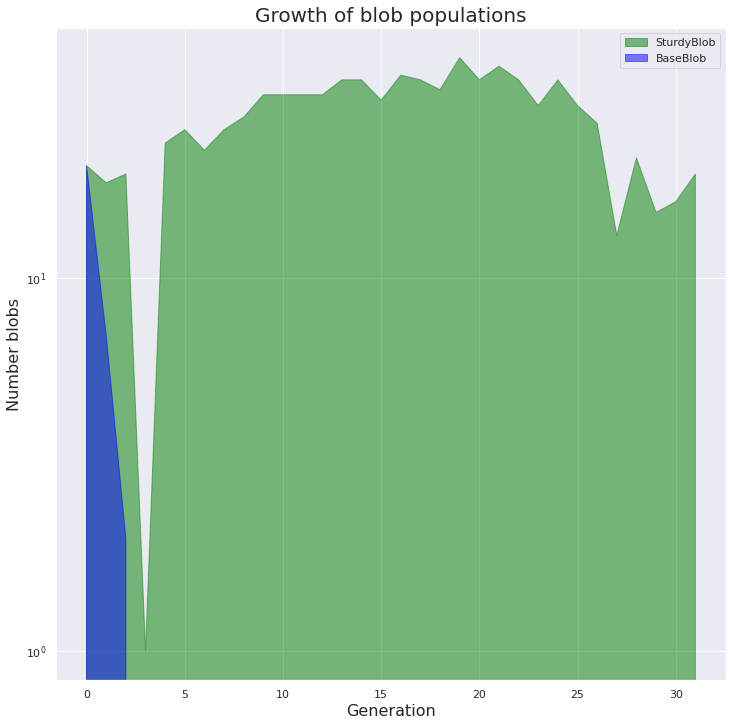

In [65]:
e = BaseEnvironment()
e.spawn_population(diers + survivors)

for i in range(30):
    e.interact()
    
e.plot_growth(log=True)

That checks out. Now that we've established that having a survival rate considerably lower than a reproductive rate is a disadvantage for long-term survival, let's introduce a mutation to the `diers`

In [66]:
#diers now have a 0.5 chance to mutate
diers = [BaseBlob() for x in range(20)]
for d in diers:
    #mutated offspring are considerably sturdier than even the sturdy blobs
    d.set_probs(0.3, 0.5, 0.3)
    d.mutated_offspring_traits = (0.9, 0.5, 0.0)

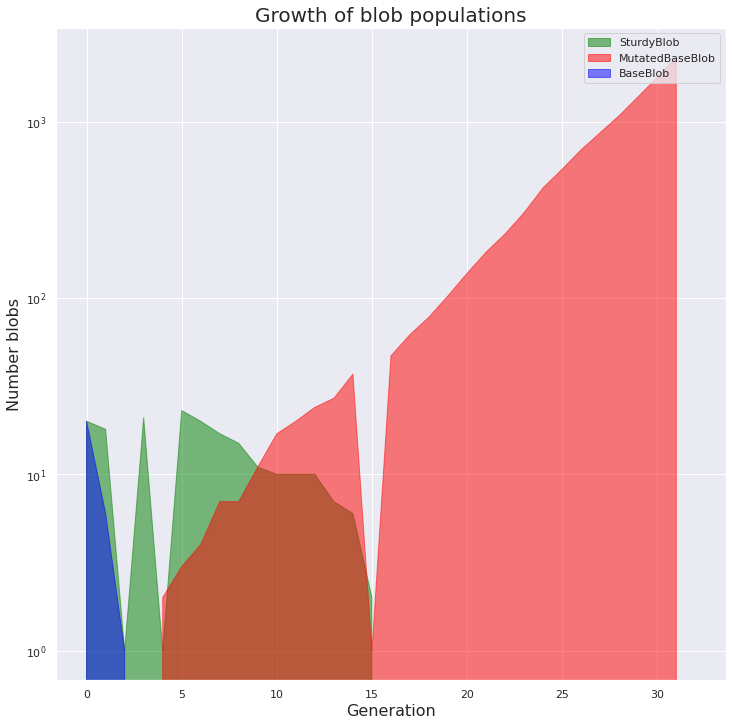

In [68]:
e = BaseEnvironment()
e.spawn_population(diers + survivors)

for i in range(30):
    e.interact()
    
e.plot_growth(log=True)

Wow! Even though the mutated blobs didn't exist from the start, once the mutations began, they quickly took over.

While this seems simple, consider that:
1. We have produced a simple model of natural selection just by altering the value of a single trait
2. The graph above is a log scale, which means that very quickly after just this small increase in survival advantages appeared, it took over. This goes to show how even small advantages in nature can manifest in large, species-wide effects